In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import xarray as xr
import ghibtools as gh
import tqdm
from params import *
from deform_tools import deform_to_cycle_template

%matplotlib inline

In [4]:
da_tf = xr.load_dataarray(f'../dataarray/da_tf_{patient}.nc')

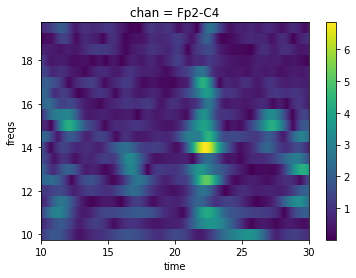

In [8]:
da_tf.loc['Fp2-C4',:,10:30].plot()

In [26]:
rsp_features = pd.read_excel(f'../df_analyse/resp_features_{patient}.xlsx', index_col = [0])

In [27]:
rsp_features

,patient,cycle_num,inspi_index,expi_index,inspi_time,expi_time,cycle_duration,insp_duration,exp_duration,cycle_freq,insp_volume,exp_volume,total_amplitude,insp_amplitude,exp_amplitude
0,P1,0,106,386,0.414062,1.507812,3.480469,1.093750,2.386719,0.287318,4.385588,-8.666698,16.760317,7.007745,9.752572
1,P1,1,997,1260,3.894531,4.921875,2.941406,1.027344,1.914062,0.339973,4.358856,-7.304945,14.472632,6.356609,8.116023
2,P1,2,1750,2036,6.835938,7.953125,2.921875,1.117188,1.804688,0.342246,5.878432,-8.636705,17.935857,7.655543,10.280315
3,P1,3,2498,2784,9.757812,10.875000,2.847656,1.117188,1.730469,0.351166,6.638856,-9.320204,24.845939,9.870429,14.975511
4,P1,4,3227,3497,12.605469,13.660156,2.710938,1.054688,1.656250,0.368876,9.314802,-10.707655,30.863582,15.854817,15.008765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,P1,2347,1739402,1739660,6794.539062,6795.546875,2.714844,1.007812,1.707031,0.368345,3.146200,-3.676323,8.940561,4.945372,3.995189
2348,P1,2348,1740097,1740345,6797.253906,6798.222656,2.652344,0.968750,1.683594,0.377025,3.486908,-4.390518,11.982176,5.627687,6.354489
2349,P1,2349,1740776,1741032,6799.906250,6800.906250,2.507812,1.000000,1.507812,0.398754,2.909783,-3.793214,10.642699,4.902590,5.740108
2350,P1,2350,1741418,1741675,6802.414062,6803.417969,2.445312,1.003906,1.441406,0.408946,2.453249,-3.601574,9.652076,4.328528,5.323548


In [34]:
da_tf.loc['Fp2-C4',:,:].values.T.shape

(1743360, 20)

In [91]:
da_tf

<xarray.DataArray (chan: 8, freqs: 20, time: 1743360)>
array([[[0.5170305 , 0.51200003, 0.50697609, ..., 0.53215514,
         0.52710864, 0.5220669 ],
        [1.58749827, 1.58650468, 1.58548796, ..., 1.59034055,
         1.58941617, 1.58846876],
        [1.0818942 , 1.0826775 , 1.08349984, ..., 1.07977651,
         1.08044391, 1.08114974],
        ...,
        [1.12314381, 1.12229246, 1.12143333, ..., 1.12565285,
         1.12482385, 1.12398756],
        [0.51827078, 0.5216693 , 0.52505012, ..., 0.50798148,
         0.5114256 , 0.5148558 ],
        [0.53970268, 0.53930247, 0.53890064, ..., 0.54089301,
         0.54049801, 0.54010121]],

       [[1.33964549, 1.34275649, 1.34585983, ..., 1.33026637,
         1.33340044, 1.33652681],
        [0.78913817, 0.78953969, 0.78992444, ..., 0.78783326,
         0.78828493, 0.78871991],
        [1.84650136, 1.84888255, 1.85125393, ..., 1.83930154,
         1.8417106 , 1.84411063],
...
        [1.70975922, 1.70526002, 1.7007013 , ..., 1.72289781,
         1.71857828, 1.71419869],
        [1.77375278, 1.77507569, 1.77626712, ..., 1.76899249,
         1.77071142, 1.7722981 ],
        [2.77155587, 2.76749332, 2.76333049, ..., 2.78314288,
         2.77938053, 2.77551824]],

       [[1.90482994, 1.90673511, 1.90860021, ..., 1.89887461,
         1.90089962, 1.90288476],
        [2.19402169, 2.19455504, 2.19505474, ..., 2.19221935,
         2.19285388, 2.19345465],
        [1.8417708 , 1.84297848, 1.84412878, ..., 1.8378056 ,
         1.83918413, 1.84050594],
        ...,
        [1.06458762, 1.06699918, 1.06944542, ..., 1.05758181,
         1.05987681, 1.06221279],
        [3.10365067, 3.09774004, 3.09175936, ..., 3.1209615 ,
         3.11526147, 3.10949117],
        [2.0737201 , 2.07973978, 2.08560767, ..., 2.05475821,
         2.0612285 , 2.06754941]]])
Coordinates:
  * freqs    (freqs) float64 10.0 10.5 11.0 11.5 12.0 ... 18.0 18.5 19.0 19.5
  * time     (time) float64 0.0 0.003906 0.007812 ... 6.81e+03 6.81e+03 6.81e+03
  * chan     (chan) object 'Fp2-C4' 'C4-T4' 'T4-O2' ... 'Fp1-C3' 'C3-T3' 'T3-O1'

In [80]:
clipped_times, times_to_cycles, cycles, cycle_points, deformed_data = deform_to_cycle_template(data = da_tf.loc['Fp2-C4',:,:].values.T, times = da_tf.coords['time'].values , cycle_times=rsp_features[['inspi_time','expi_time']].values, nb_point_by_cycle=1000, inspi_ratio = 0.4)

In [81]:
cycles

array([   0,    1,    2, ..., 2345, 2346, 2347])

In [82]:
cycle_points[-1]

2347.9990000000003

In [83]:
times_to_cycles[-1]

2348.99837398374

In [84]:
clipped_times.shape

(1741938,)

In [85]:
deformed_data.shape

(2348000, 20)

In [86]:
deformed = deformed_data.T

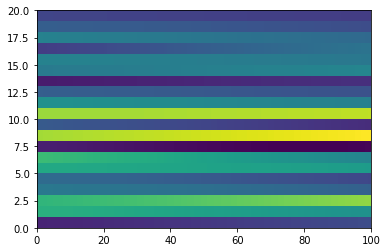

In [87]:
plt.pcolormesh(deformed[:,0:100])

In [88]:
deformed_data.T.shape

(20, 2348000)

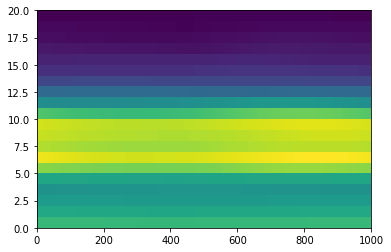

In [90]:
plt.pcolormesh(np.mean(tf_cycle_stretch, axis = 0))

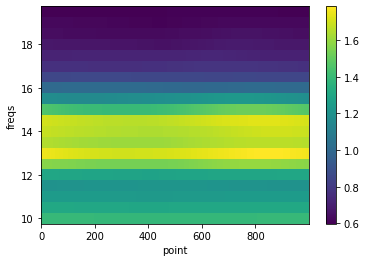

In [102]:
da_stretch_cycle.mean('cycle').plot()

In [63]:
shape

(2349, 20, 100)

In [103]:
def tf_cycle_stretch(da, chan, rsp_features, nb_point_by_cycle=1000, inspi_ratio = 0.4):
    # da = 3d da (chan * freqs * time)
    clipped_times, times_to_cycles, cycles, cycle_points, deformed_data = deform_to_cycle_template(data = da.loc[chan,:,:].values.T,
                                                                                                   times = da.coords['time'].values , 
                                                                                                   cycle_times=rsp_features[['inspi_time','expi_time']].values, 
                                                                                                   nb_point_by_cycle=nb_point_by_cycle, 
                                                                                                   inspi_ratio = inspi_ratio)
    deformed = deformed_data.T
    
    shape = (cycles.size , deformed.shape[0] , nb_point_by_cycle)
    data = np.zeros(shape)
    da_stretch_cycle = xr.DataArray(data=data , dims = ['cycle','freqs','point'], coords = {'cycle' : cycles, 'freqs': da.coords['freqs'].values , 'point':np.arange(0,nb_point_by_cycle,1)})
    for cycle in cycles:
        data_of_the_cycle = deformed[:,cycle*nb_point_by_cycle:(cycle+1)*nb_point_by_cycle]
        da_stretch_cycle.loc[cycle, : , :] = data_of_the_cycle
    return da_stretch_cycle

In [104]:
da_stretch_cycle = tf_cycle_stretch(da = da_tf, chan = 'Fp2-C4' , rsp_features = rsp_features)

In [105]:
da_stretch_cycle

<xarray.DataArray (cycle: 2348, freqs: 20, point: 1000)>
array([[[0.27814551, 0.28019022, 0.28226229, ..., 0.68936314,
         0.68716033, 0.68496613],
        [1.3546136 , 1.35227161, 1.34992218, ..., 0.87405607,
         0.87560907, 0.87715326],
        [1.38522472, 1.38851396, 1.39181301, ..., 0.68083311,
         0.68090792, 0.68099332],
        ...,
        [0.9575034 , 0.95573889, 0.95396682, ..., 0.16369401,
         0.16371618, 0.16372729],
        [0.67050213, 0.66990999, 0.66930291, ..., 0.44506752,
         0.44575855, 0.44645015],
        [0.48914767, 0.48869341, 0.4882369 , ..., 0.98982951,
         0.99081536, 0.99178711]],

       [[0.68278072, 0.68137547, 0.67997301, ..., 0.03117233,
         0.02978514, 0.02840861],
        [0.87868869, 0.87967443, 0.88065754, ..., 0.81580636,
         0.81382729, 0.81184995],
        [0.68108914, 0.68115764, 0.68122921, ..., 0.69866441,
         0.70200952, 0.70535828],
...
        [0.62252531, 0.62166469, 0.62080049, ..., 0.61084227,
         0.6142095 , 0.61755872],
        [0.47197476, 0.4706309 , 0.46928439, ..., 0.69390087,
         0.69310936, 0.69231549],
        [0.45315297, 0.45237339, 0.45159655, ..., 0.81569623,
         0.81564539, 0.81558811]],

       [[2.02665443, 2.02835429, 2.03004638, ..., 1.24328708,
         1.24336343, 1.24343986],
        [0.92734769, 0.92746627, 0.92758239, ..., 1.2424808 ,
         1.24471052, 1.24693819],
        [2.22643189, 2.22681714, 2.22719675, ..., 1.25585014,
         1.25573301, 1.25561538],
        ...,
        [0.6208899 , 0.62383116, 0.62676066, ..., 0.48506236,
         0.48167836, 0.47828589],
        [0.69151934, 0.69080704, 0.69009361, ..., 0.21683756,
         0.21822674, 0.2196421 ],
        [0.8155245 , 0.81545892, 0.81538961, ..., 0.8628964 ,
         0.86253776, 0.86218628]]])
Coordinates:
  * cycle    (cycle) int64 0 1 2 3 4 5 6 ... 2341 2342 2343 2344 2345 2346 2347
  * freqs    (freqs) float64 10.0 10.5 11.0 11.5 12.0 ... 18.0 18.5 19.0 19.5
  * point    (point) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999